# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

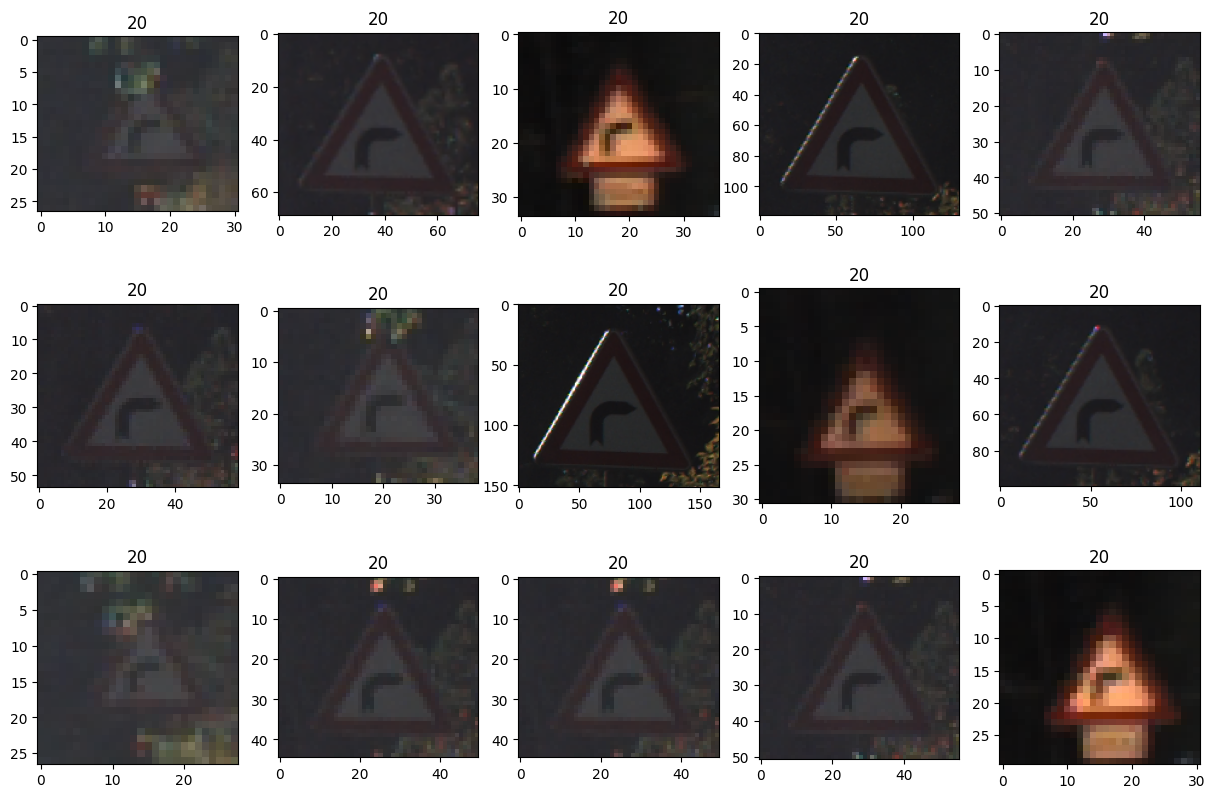

In [5]:
# Load the training labels
root = '../../dataset' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = 42

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [11]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

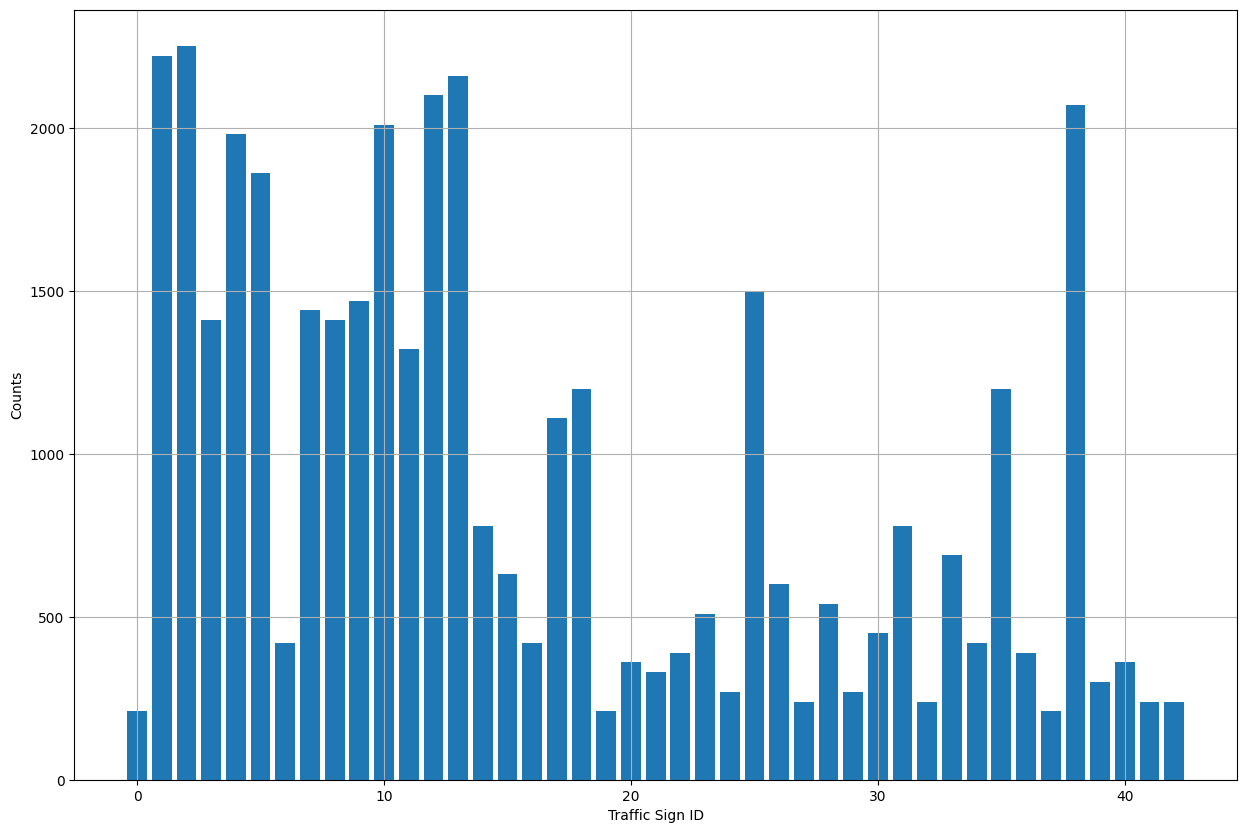

In [12]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

Dataset is not balanced because there are too much different classes with different amount, they can differ in 10 times. Classes 1,2 have much more images and 0,19 have less images

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

I tried to see what we have in difference for resolution

In [13]:
ids_width = data['Width']

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

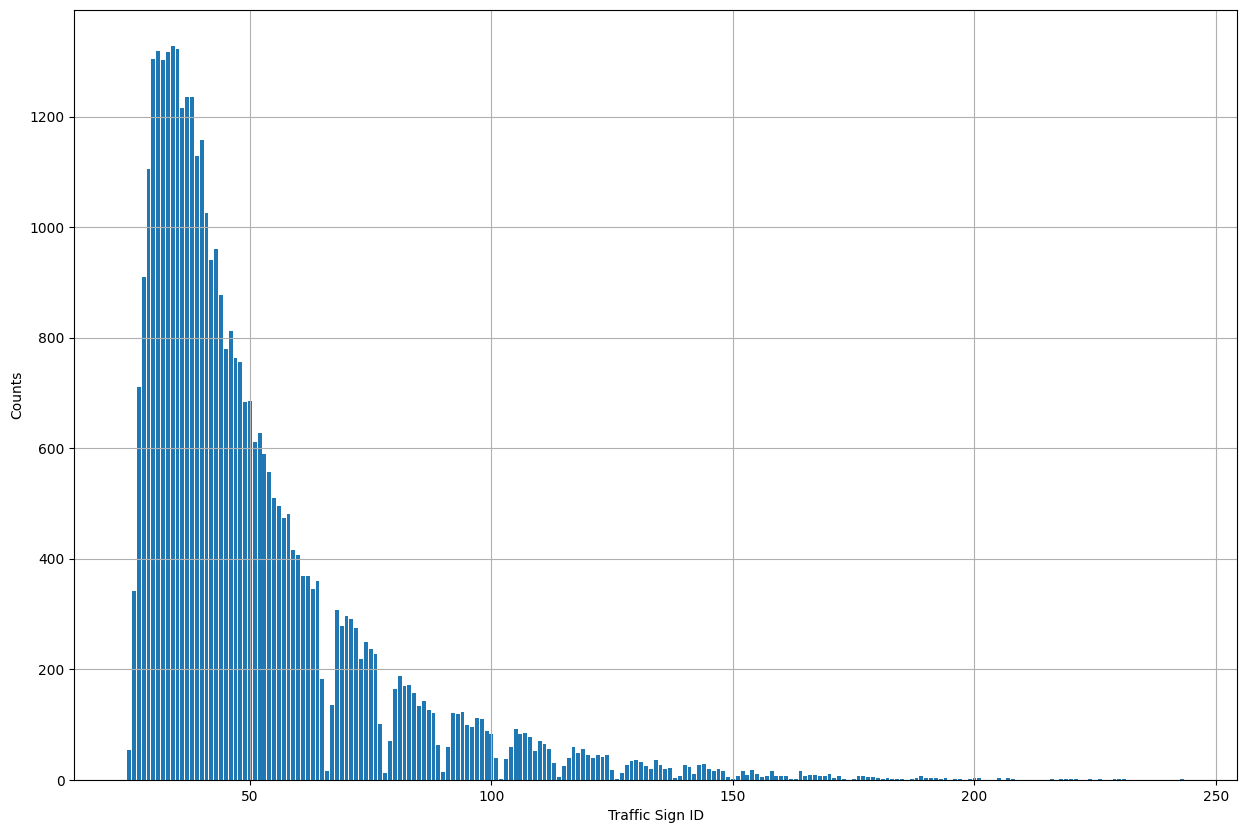

In [14]:
from collections import Counter
hist = Counter(ids_width)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

We have very different width. Now, let's try to check brightness of few folder.

In [16]:
def calculate_average_brightness(image_folder):
    # List all files in the folder
    image_files = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))]
    
    total_brightness = 0
    num_images = len(image_files)
    
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        # Read the image
        image = cv2.imread(image_path)
        
        if image is not None:
            # Convert image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            # Calculate the mean brightness
            brightness = np.mean(gray_image)
            total_brightness += brightness
        else:
            print(f"Failed to load image: {image_path}")
            num_images -= 1  # Exclude the failed image from the count
    
    if num_images == 0:
        return 0
    
    # Calculate the average brightness
    average_brightness = total_brightness / num_images
    return average_brightness

image_folder = "../../dataset/Train/20"
average_brightness = calculate_average_brightness(image_folder)
print(f"The average brightness of images in the folder is: {average_brightness}")

image_folder = "../../dataset/Train/22"
average_brightness = calculate_average_brightness(image_folder)
print(f"The average brightness of images in the folder is: {average_brightness}")


The average brightness of images in the folder is: 57.361866856802884
The average brightness of images in the folder is: 109.74736134081613


let's build visual presentation

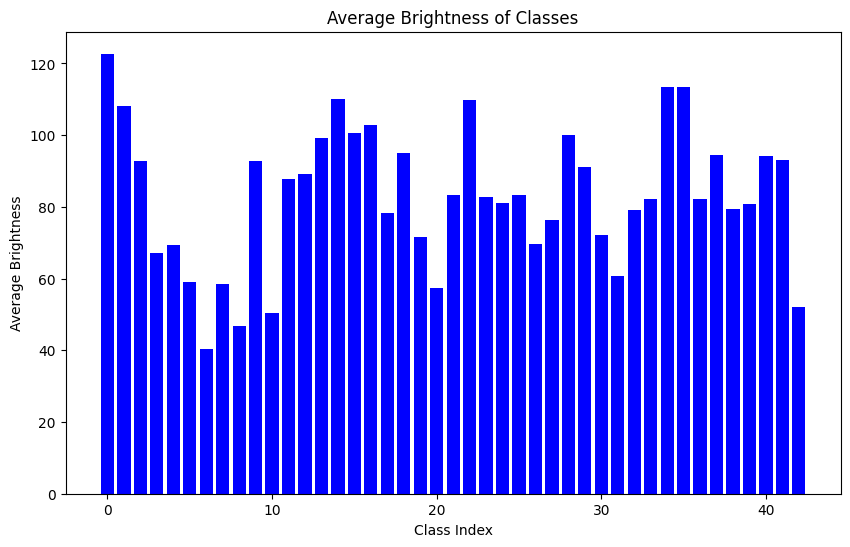

In [18]:
base_folder = "../../dataset/Train/"
num_folders = 43
average_brightness_list = []

for i in range(num_folders):
    folder_path = os.path.join(base_folder, str(i))
    if os.path.isdir(folder_path):
        average_brightness = calculate_average_brightness(folder_path)
        average_brightness_list.append(average_brightness)
    else:
        print(f"Folder not found: {folder_path}")
        average_brightness_list.append(0)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(num_folders), average_brightness_list, color='blue')
plt.xlabel('Class Index')
plt.ylabel('Average Brightness')
plt.title('Average Brightness of Classes')
plt.show()